 **➡️Install Required Libraries**

In [1]:
!pip install imbalanced-learn pandas

 **➡️Import Libraries**

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC
from sklearn.model_selection import train_test_split

 **➡️Load the Data**

In [3]:
file_path = '/content/Cleaned_Accumulative_distribution.csv'
data = pd.read_csv(file_path)

# Display basic info
print(data.head())
print("\nClass Distribution Before SMOTE:")
print(data['Type'].value_counts())

         ID           Type  Movie_number  Fly_number  Other_number  \
0 -1.731908  Dmelanogaster     -1.540178   -1.474087     -1.647509   
1 -1.731623  Dmelanogaster     -1.540178   -1.300665     -1.647509   
2 -1.731339  Dmelanogaster     -1.540178   -1.127243     -1.647509   
3 -1.731054  Dmelanogaster     -1.540178   -0.953821     -1.647509   
4 -1.730769  Dmelanogaster     -1.540178   -0.780399     -1.647509   

   Difference_x  Difference_y  Distance  
0     -0.291126      0.136903 -0.968219  
1     -0.714968     -0.445300 -0.413533  
2     -1.780003      1.731326  1.374617  
3     -1.871965     -1.020045  0.942211  
4     -0.289079      0.247088 -0.897781  

Class Distribution Before SMOTE:
Type
Dmelanogaster     4560
Calocasiae(IR)    4180
Calocasiae        3420
Name: count, dtype: int64


 **➡️Separate Data for SMOTE**



*   Separate features (X) and target (y).
*   Encode categorical features if necessary.



In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
data['Type'] = le.fit_transform(data['Type'])

X = data.drop(columns=['Type', 'ID'])
y = data['Type']

**➡️Apply Different SMOTE Variants**

# **🌸Basic SMOTE**

In [5]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print("\nClass Distribution After Basic SMOTE:")
print(pd.Series(y_res).value_counts())


Class Distribution After Basic SMOTE:
Type
2    4560
0    4560
1    4560
Name: count, dtype: int64


# **🌸SMOTEN (For Categorical Data)**

In [6]:
smoten = SMOTEN(random_state=42)
X_res_n, y_res_n = smoten.fit_resample(X, y)
print("\nClass Distribution After SMOTEN:")
print(pd.Series(y_res_n).value_counts())


Class Distribution After SMOTEN:
Type
2    4560
0    4560
1    4560
Name: count, dtype: int64


# **🌸SMOTENC (for Mixed Data: Numeric + Categorical)**

In [7]:
from numpy import where

# Define categorical feature indices (update as needed)
categorical_features = [X.columns.get_loc('Fly_number')]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_res_nc, y_res_nc = smotenc.fit_resample(X, y)
print("\nClass Distribution After SMOTENC:")
print(pd.Series(y_res_nc).value_counts())


Class Distribution After SMOTENC:
Type
2    4560
0    4560
1    4560
Name: count, dtype: int64


# **🌸Adaptive SMOTE (ADASYN)**

In [9]:
from collections import Counter
print("Class Distribution Before ADASYN:", Counter(y))


Class Distribution Before ADASYN: Counter({2: 4560, 1: 4180, 0: 3420})


In [10]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy={0: 4560}, random_state=42)  # Balance Class 0 to 4560
X_res_ada, y_res_ada = adasyn.fit_resample(X, y)
print("\nClass Distribution After ADASYN:")
print(Counter(y_res_ada))



Class Distribution After ADASYN:
Counter({0: 4720, 2: 4560, 1: 4180})


# **🌸SAFER SMOTE**

In [12]:
from imblearn.over_sampling import SVMSMOTE

safer_smote = SVMSMOTE(random_state=42)
X_res_safe, y_res_safe = safer_smote.fit_resample(X, y)
print("\nClass Distribution After Safer SMOTE:")
print(pd.Series(y_res_safe).value_counts())


Class Distribution After Safer SMOTE:
Type
2    4560
0    4560
1    4560
Name: count, dtype: int64


**➡️Comparison Plot for Each Technique**

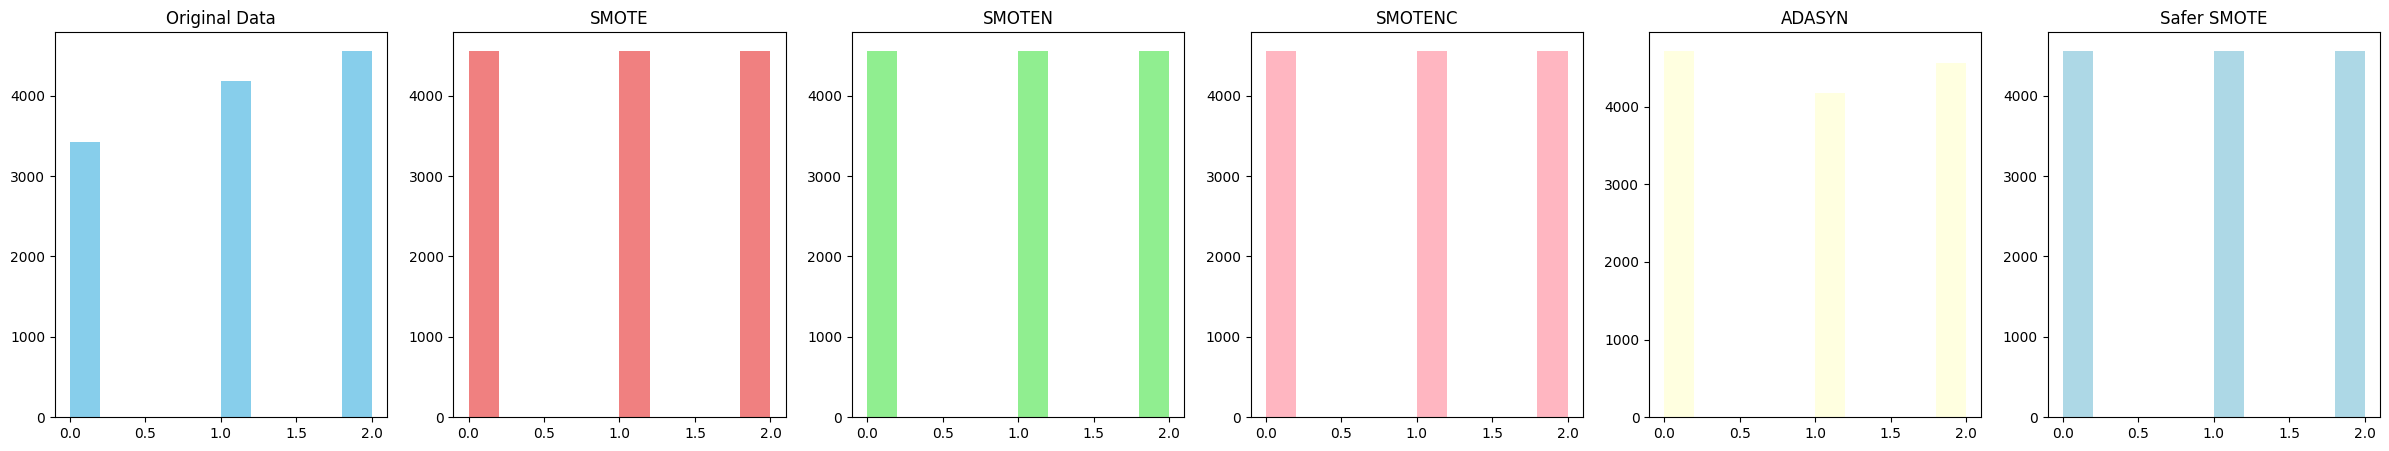

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 6, figsize=(30, 5))
ax[0].hist(y, color='skyblue')
ax[0].set_title('Original Data')
ax[1].hist(y_res, color='lightcoral')
ax[1].set_title('SMOTE')
ax[2].hist(y_res_n, color='lightgreen')
ax[2].set_title('SMOTEN')
ax[3].hist(y_res_nc, color='lightpink')
ax[3].set_title('SMOTENC')
ax[4].hist(y_res_ada, color='lightyellow')
ax[4].set_title('ADASYN')
ax[5].hist(y_res_safe, color='lightblue')
ax[5].set_title('Safer SMOTE')

plt.show()